# K-Means Clustering

### Unsupervised Algorithm : We don't have any dependant variable present. We have to use what we have - features - to create the depedant variable

**How it works**

1. Start with K centroids by putting them at any **random** place
2. Identify distance of each points from the centroid : how? draw a middle perpendicular line between centroids. It has a property that any point **on** the line is at same distance from the centroids(let's say 2). 
3. We try to improve the clusters by adjusting the centroids. Find new centre of gravity based on the clusters formed and then perform the step 2 again.
4. Repeat until none of the points change the cluster

![steps](images/steps.png)

Any point on the green line is equidistant from the randomly choosent blue and red centroid (squared) Going by the **Euclidian** distance we can easily form our first cluster.

![step3](images/step3.png)

Find new centroid(by choosing centre of gravity point based on existing cluster)

![step4](images/step4.png)

Keep on doing it until we have no point that would change the cluster

![step5](images/step5.png)

### Random Initialization Trap

When the first random clusters are chosen, a lot depends on how/where they are chosen. If they are chosen badly, then it might give us a bad cluster

#### Ideal Randomly Selected Points and Cluster Formation

![randomseletionideal](images/randomselectionideal.png)

#### Bad Random Selections

![randomseletionbad](images/randomselectionbad.png)

### CONCLUSION/SOLUTION: 

The randomly selected points position can actually dictate the cluster formation. We need to use "k-means++' to handle this since now we are aware that there could a TRUE cluster (first ideal case) and there could be a FALSE/BAD cluster (second case)

### CHOOSING THE RIGHT NUMBER OF CLUSTERS : WCSS

#### WCSS : Squared distance between every points and its cluster

![wcss](images/wcss.png)

#### Decreasing WCSS as we increase the number of clusters. 

It's intuitive. When the cluster is only 1, the distance between each point and the centroid will be massive.

![decreasingwcss](images/decreasingwcss.png)

#### SOLUTION? Elbow Method: 
The wcss(squared distance sum) will keep on decreasing as we keep on increasing the number of clusters. So we settle for a point where the % decrease kind of settles/cools down

![elbowwcss](images/elbowwcss.png)

---

**Problem Statement:** The company wants to understand its customers/identify patterns within customers. We do not have any dependant variable unlike as it happened in classficiation. We have : Gender, Age, Income Score, Spending Score

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The reason of taking only 2 features is to be able to visualise the results. Nothing else.

In [5]:
X = dataset.iloc[:, [3, 4]].values

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### We should do feature scaling. Even though it's not done in this example. Not reason not to do so.

## Using the elbow method to find the optimal number of clusters

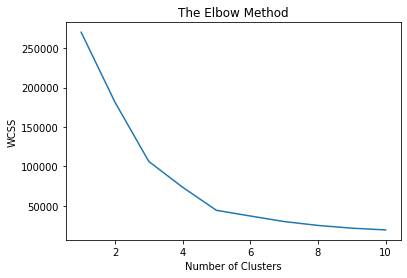

In [8]:
from sklearn.cluster import KMeans
#wcss will be the sum of squared distance from centroids to the points.
wcss = []

for i in range(1, 11):
    #Avoid Random Initiliasation Trap by using init parameter
    #Enter any random state number to have same results when re-run
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #intertia_ gives us wcss value
    wcss.append(kmeans.inertia_)

    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

From the number = 5, it starts decreasing SLOWLY, so we will pick **number of clusters as 5**

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#We also need to create cluster variable/depedant variable and also train our model
#It can be done in a single step

#It trains the model as well as create a depedant variable
y_kmeans = kmeans.fit_predict(X)

In [11]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

Approach : Make scatterplots for each clusters

In [13]:
type(X)

numpy.ndarray

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
y_kmeans == 0

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [26]:
#Coordinates of Centroids of clusters
kmeans.cluster_centers_[:]

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

---

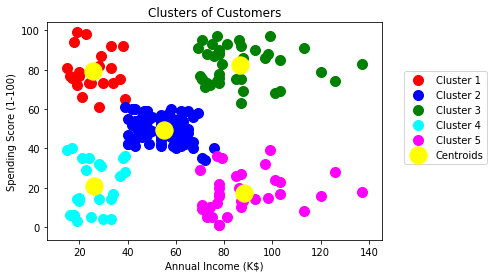

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

#centroid: X coordinate and Y coordinate
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc = 'upper left')

**Observations / Business Strategy**
- Green cluster of customers spend a lot and earn a lot - Premium **We can target**
- Blue cluster of customers spend average and earn average - Middle Class
- Cyan cluster of customers spend less and earn less - Poor
- Pink cluster of customers spend less and earn a lot - **Brainstorm for marketing**